In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_train = pd.read_csv('dataset/train.csv')

In [14]:
df_train.shape

(28200, 22)

In [15]:
df_train = df_train[df_train['windmill_generated_power(kW/h)'].fillna(0)!=0]

In [16]:
df_train.shape

(27993, 22)

In [17]:
# df_train.describe(percentiles = [.01,.25, .5, .75,.90,0.99])

In [18]:
# for col in df_train.columns:
#     if df_train[col].dtype !=object:
#         print(col)
#         sns.distplot(df_train[col])

In [21]:
# df_train.shape

In [22]:
# for col in df_train.columns:
#     if df_train[col].dtype!=object:
#         df_train = df_train[(df_train[col]<=df_train[col].quantile(0.9999)) & (df_train[col]>=df_train[col].quantile(0.0001))]
#         print(df_train.shape)
#         print(col,df_train[col].quantile(0.99))

In [24]:
# df_train.shape

In [25]:
df_test = pd.read_csv('dataset/test.csv')

In [26]:
df_train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [27]:
df_train.shape

(27993, 22)

In [28]:
df_test.shape

(12086, 21)

In [29]:
df_train.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)'],
      dtype='object')

In [30]:
df_train['datetime'].min(),df_train['datetime'].max()

('2018-10-28 20:53:20', '2019-09-23 06:33:20')

In [31]:
df_test['datetime'].min(),df_test['datetime'].max()

('2018-10-28 21:13:20', '2019-09-23 05:53:20')

In [32]:
#Almost an year of data

In [33]:
df = pd.concat([df_train,df_test],axis=0)

C:\Users\kungw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [34]:
df.shape

(40079, 22)

In [35]:
df.tail()

,area_temperature(°C),atmospheric_pressure(Pascal),atmospheric_temperature(°C),blade_breadth(m),blade_length(m),blades_angle(°),cloud_level,datetime,engine_temperature(°C),gearbox_temperature(°C),...,resistance(ohm),rotor_torque(N-m),shaft_temperature(°C),tracking_id,turbine_status,wind_direction(°),wind_speed(m/s),windmill_body_temperature(°C),windmill_generated_power(kW/h),windmill_height(m)
12081,28.424722,17239.345506,18.517204,0.407771,3.286975,-1.094038,Medium,2019-02-12 11:33:20,44.486619,44.550547,...,1798.141681,-14.365696,43.545409,WM_13376,NaN,509.795489,-15.039400,42.128526,NaN,20.888674
12082,50.615296,17131.448669,-99.000000,0.367823,NaN,1.750553,Low,2018-11-12 17:33:20,42.848779,43.308176,...,1680.245230,-7.062661,44.747916,WM_1630,AB,345.705839,97.594116,47.353528,NaN,24.793606
12083,20.983939,118707.643665,8.109976,0.459887,3.728375,-0.691090,Low,2019-05-27 11:53:20,41.177782,214.904165,...,2343.165194,12.331790,43.252012,WM_24703,BA,205.569627,16.186805,41.768478,NaN,5.653451
12084,29.114305,17155.269313,-99.000000,0.394680,2.247676,-1.171974,Medium,2019-05-13 21:53:20,42.039796,41.976913,...,1732.883672,NaN,43.841789,WM_22893,A,260.578999,93.254033,82.750271,NaN,24.591364
12085,39.491015,130018.594173,13.245828,0.490893,NaN,9.258178,Medium,2019-02-20 23:43:20,46.312684,132.587960,...,-99.000000,19.467561,43.480982,WM_14513,A2,NaN,42.607485,97.070812,NaN,21.665001


In [36]:
df.describe()

,area_temperature(°C),atmospheric_pressure(Pascal),atmospheric_temperature(°C),blade_breadth(m),blade_length(m),blades_angle(°),engine_temperature(°C),gearbox_temperature(°C),generator_temperature(°C),motor_torque(N-m),resistance(ohm),rotor_torque(N-m),shaft_temperature(°C),wind_direction(°),wind_speed(m/s),windmill_body_temperature(°C),windmill_generated_power(kW/h),windmill_height(m)
count,40078.000000,3.623800e+04,35230.000000,40079.000000,32908.000000,39761.000000,40062.000000,40077.000000,40062.000000,40044.000000,40078.000000,39231.000000,40076.000000,32861.000000,39682.000000,36801.000000,27993.000000,39286.000000
mean,32.749245,5.342142e+04,0.466870,0.397331,2.234388,-9.524610,42.608387,40.796947,65.081918,1712.524650,1577.205576,26.064411,40.035845,307.220956,69.137599,20.809466,6.130529,25.907803
std,7.694202,1.873695e+05,44.212289,0.061346,11.362110,47.814857,6.157035,43.324226,19.827646,827.809291,483.319867,32.335210,27.171763,133.910496,76.264965,54.057860,2.697520,7.753789
min,-30.000000,-1.207259e+06,-99.000000,0.200009,-99.000000,-146.259543,-5.000000,-244.974098,30.000000,500.000000,-1654.449587,-182.169613,-99.000000,0.000000,-525.530600,-999.000000,0.962305,-30.295253
25%,27.343265,1.679449e+04,7.997802,0.347218,2.537498,-1.195625,41.915892,40.524821,41.221971,871.412156,1269.581829,13.735735,41.633962,238.689195,21.188533,40.413251,4.059505,24.448488
50%,32.616438,1.819173e+04,16.132262,0.398882,3.447669,-0.496867,43.535294,43.219350,70.743501,2031.826298,1678.588841,33.020969,43.691750,271.607699,93.309288,42.786016,5.764710,25.954806
75%,38.248741,1.181549e+05,23.747805,0.449758,4.352847,5.713218,45.188092,45.863665,79.039646,2465.839368,1831.658908,41.671364,45.697401,403.874928,95.264355,44.496489,7.947195,27.482285
max,55.000000,1.272552e+06,80.442232,0.499985,18.209800,170.047823,50.000000,999.000000,100.000000,3000.000000,4693.481933,236.883264,183.299983,570.857751,601.455670,323.000000,20.175358,78.351335


In [37]:
# windmill_generated_power(kW/h) has to be predicted

In [38]:
categorical_col = []
continous_col = []

for col in df.columns:
    if df[col].dtype==object:
        categorical_col.append(col)
    else:
        continous_col.append(col)
    

In [39]:
ds_null_values = df.isnull().sum()
for col,qty in ds_null_values.iteritems():
    if col == 'windmill_generated_power(kW/h)':
        continue
    if col in categorical_col:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())
    print(col,qty*100/df.shape[0])
    

area_temperature(°C) 0.0024950722323411265
atmospheric_pressure(Pascal) 9.583572444422266
atmospheric_temperature(°C) 12.098605254622122
blade_breadth(m) 0.0
blade_length(m) 17.892162978118215
blades_angle(°) 0.7934329698844782
cloud_level 0.9905436762394272
datetime 0.0
engine_temperature(°C) 0.04241622794979915
gearbox_temperature(°C) 0.004990144464682253
generator_temperature(°C) 0.04241622794979915
motor_torque(N-m) 0.08732752813193942
resistance(ohm) 0.0024950722323411265
rotor_torque(N-m) 2.115821253025275
shaft_temperature(°C) 0.0074852166970233785
tracking_id 0.0
turbine_status 6.347463759075826
wind_direction(°) 18.00943137303825
wind_speed(m/s) 0.9905436762394272
windmill_body_temperature(°C) 8.178846777614211
windmill_height(m) 1.9785922802465132


In [40]:
df.isnull().sum()

area_temperature(°C)                  0
atmospheric_pressure(Pascal)          0
atmospheric_temperature(°C)           0
blade_breadth(m)                      0
blade_length(m)                       0
blades_angle(°)                       0
cloud_level                           0
datetime                              0
engine_temperature(°C)                0
gearbox_temperature(°C)               0
generator_temperature(°C)             0
motor_torque(N-m)                     0
resistance(ohm)                       0
rotor_torque(N-m)                     0
shaft_temperature(°C)                 0
tracking_id                           0
turbine_status                        0
wind_direction(°)                     0
wind_speed(m/s)                       0
windmill_body_temperature(°C)         0
windmill_generated_power(kW/h)    12086
windmill_height(m)                    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B50E84EC88>,
      dtype=object)

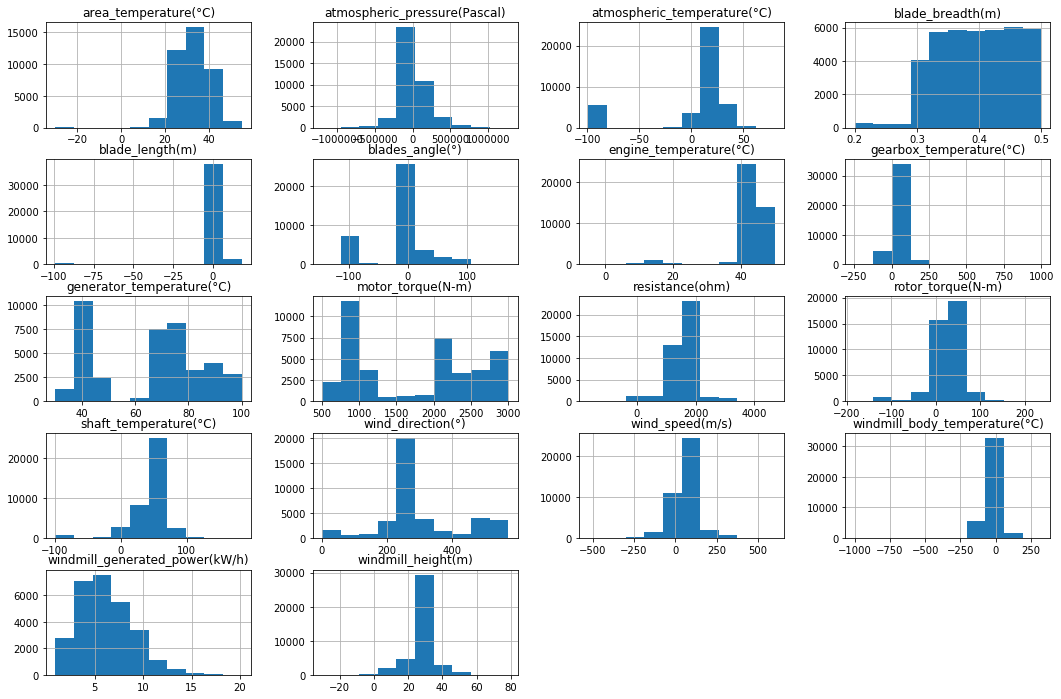

In [54]:
plt.rcParams['figure.figsize'] = (18.0, 12.0)
df.hist()

In [800]:
df[categorical_col]

,cloud_level,datetime,tracking_id,turbine_status
2,Medium,2019-09-14 14:03:20,WM_39146,ABC
3,Low,2018-12-25 15:33:20,WM_6757,ABC
4,Medium,2019-05-04 03:13:20,WM_21521,AAA
6,Low,2019-04-17 18:33:20,WM_19873,BD
7,Low,2019-07-08 21:03:20,WM_30330,BA
...,...,...,...,...
12081,Medium,2019-02-12 11:33:20,WM_13376,B2
12082,Low,2018-11-12 17:33:20,WM_1630,AB
12083,Low,2019-05-27 11:53:20,WM_24703,BA
12084,Medium,2019-05-13 21:53:20,WM_22893,A


In [801]:
df.drop(['tracking_id'],axis=1,inplace=True)

In [802]:
df['turbine_status'].value_counts()

B2     4903
A      2551
BB     2551
BCB    2502
AAA    2466
D      2461
BA     2436
AB     2431
ABC    2430
B      2411
A2     2406
BD     2405
BBB    2402
AC     2377
Name: turbine_status, dtype: int64

In [803]:
df['cloud_level'].value_counts()

Low              18449
Medium           17878
Extremely Low      405
Name: cloud_level, dtype: int64

In [804]:
df['date'] = df['datetime'].apply(lambda string : string.split(' ')[0])
df['time'] = df['datetime'].apply(lambda string : string.split(' ')[1])

In [805]:
df.drop(['datetime'],axis=1,inplace=True)

In [806]:
df['date']

2        2019-09-14
3        2018-12-25
4        2019-05-04
6        2019-04-17
7        2019-07-08
            ...    
12081    2019-02-12
12082    2018-11-12
12083    2019-05-27
12084    2019-05-13
12085    2019-02-20
Name: date, Length: 36732, dtype: object

In [807]:
df_train['windmill_generated_power(kW/h)']

2         2.874342
3        14.851089
4         3.519074
6         5.089173
7         8.536889
           ...    
28195     9.587934
28196     4.522195
28197    11.096599
28198     9.373239
28199     2.860342
Name: windmill_generated_power(kW/h), Length: 24646, dtype: float64

In [808]:
df.columns

Index(['area_temperature(°C)', 'atmospheric_pressure(Pascal)',
       'atmospheric_temperature(°C)', 'blade_breadth(m)', 'blade_length(m)',
       'blades_angle(°)', 'cloud_level', 'engine_temperature(°C)',
       'gearbox_temperature(°C)', 'generator_temperature(°C)',
       'motor_torque(N-m)', 'resistance(ohm)', 'rotor_torque(N-m)',
       'shaft_temperature(°C)', 'turbine_status', 'wind_direction(°)',
       'wind_speed(m/s)', 'windmill_body_temperature(°C)',
       'windmill_generated_power(kW/h)', 'windmill_height(m)', 'date', 'time'],
      dtype='object')

In [809]:
# def process_date(date):
#     y,m,d = map(int,date.split("-"))
#     y=y-2018
#     return d+m*30+y*365

# def process_time(time):
#     h,m,s = map(int,time.split(":"))
#     return h*3600+m*60+s
    
# df['time'] = df['time'].apply(process_time)
# df['date'] = df['date'].apply(process_date)

In [810]:
df['hour'] = df['time'].apply(lambda t: int(t.split(":")[0]))
df['min'] = df['time'].apply(lambda t: int(t.split(":")[1]))
# df['sec'] = df['time'].apply(lambda t: int(t.split(":")[2]))

df['day'] = df['date'].apply(lambda t: int(t.split("-")[2]))
df['month'] = df['date'].apply(lambda t: int(t.split("-")[1]))
# df['year'] = df['date'].apply(lambda t: int(t.split("-")[0]))
df['week'] = df['date'].apply(lambda t: ((int(t.split("-")[1]))*30 + int(t.split("-")[2]))//7)

df.drop(['date','time'],axis=1,inplace=True)

In [811]:
df['week']

2        40
3        55
4        22
6        19
7        31
         ..
12081    10
12082    48
12083    25
12084    23
12085    11
Name: week, Length: 36732, dtype: int64

In [812]:
df1 = pd.get_dummies(df['turbine_status'],drop_first = True)

In [813]:
df.drop(['turbine_status'],axis=1,inplace=True)
df = pd.concat([df,df1],axis=1)

In [814]:
df1 = pd.get_dummies(df['cloud_level'],drop_first = True)
df.drop(['cloud_level'],axis=1,inplace=True)
df = pd.concat([df,df1],axis=1)

In [815]:
# def process_cloud_level(cloud_level):
#     if cloud_level == 'Extremely Low':
#         return 0
#     elif cloud_level == 'Low':
#         return 1
#     elif cloud_level == 'Medium':
#         return 2

In [816]:
# df['cloud_level']=df['cloud_level'].apply(process_cloud_level)

In [817]:
df.columns

Index(['area_temperature(°C)', 'atmospheric_pressure(Pascal)',
       'atmospheric_temperature(°C)', 'blade_breadth(m)', 'blade_length(m)',
       'blades_angle(°)', 'engine_temperature(°C)', 'gearbox_temperature(°C)',
       'generator_temperature(°C)', 'motor_torque(N-m)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'shaft_temperature(°C)', 'wind_direction(°)',
       'wind_speed(m/s)', 'windmill_body_temperature(°C)',
       'windmill_generated_power(kW/h)', 'windmill_height(m)', 'hour', 'min',
       'day', 'month', 'week', 'A2', 'AAA', 'AB', 'ABC', 'AC', 'B', 'B2', 'BA',
       'BB', 'BBB', 'BCB', 'BD', 'D', 'Low', 'Medium'],
      dtype='object')

In [818]:
all_col = ['area_temperature(°C)', 'atmospheric_pressure(Pascal)',
       'atmospheric_temperature(°C)', 'blade_breadth(m)', 'blade_length(m)',
       'blades_angle(°)', 'engine_temperature(°C)', 'gearbox_temperature(°C)',
       'generator_temperature(°C)', 'motor_torque(N-m)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'shaft_temperature(°C)', 'wind_direction(°)',
       'wind_speed(m/s)', 'windmill_body_temperature(°C)',
       'windmill_height(m)', 'hour', 'min',
       'day', 'month', 'week', 'A2', 'AAA', 'AB', 'ABC', 'AC', 'B', 'B2', 'BA',
       'BB', 'BBB', 'BCB', 'BD', 'D', 'Low', 'Medium']

In [819]:
df.head

<bound method NDFrame.head of        area_temperature(°C)  atmospheric_pressure(Pascal)  \
2                 36.116065                  16125.927107   
3                 46.020045                  18689.732336   
4                 34.572941                 114468.169007   
6                 33.849389                 121813.383158   
7                 30.553159                 120923.024893   
...                     ...                           ...   
12081             28.424722                  17239.345506   
12082             50.615296                  17131.448669   
12083             20.983939                 118707.643665   
12084             29.114305                  17155.269313   
12085             39.491015                 130018.594173   

       atmospheric_temperature(°C)  blade_breadth(m)  blade_length(m)  \
2                        16.080562          0.302321         2.719475   
3                       -99.000000          0.367140         4.857385   
4                 

In [820]:
for col in df.columns:
    print(col,df[col].dtype)

area_temperature(°C) float64
atmospheric_pressure(Pascal) float64
atmospheric_temperature(°C) float64
blade_breadth(m) float64
blade_length(m) float64
blades_angle(°) float64
engine_temperature(°C) float64
gearbox_temperature(°C) float64
generator_temperature(°C) float64
motor_torque(N-m) float64
resistance(ohm) float64
rotor_torque(N-m) float64
shaft_temperature(°C) float64
wind_direction(°) float64
wind_speed(m/s) float64
windmill_body_temperature(°C) float64
windmill_generated_power(kW/h) float64
windmill_height(m) float64
hour int64
min int64
day int64
month int64
week int64
A2 uint8
AAA uint8
AB uint8
ABC uint8
AC uint8
B uint8
B2 uint8
BA uint8
BB uint8
BBB uint8
BCB uint8
BD uint8
D uint8
Low uint8
Medium uint8


In [821]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(df[all_col].values, i) for i in range(df[all_col].shape[1])]
vif["features"] = df[all_col].columns

In [822]:
vif

,VIF Factor,features
0,28.651143,area_temperature(°C)
1,1.138874,atmospheric_pressure(Pascal)
2,1.016885,atmospheric_temperature(°C)
3,42.133905,blade_breadth(m)
4,1.056021,blade_length(m)
5,1.139820,blades_angle(°)
6,53.742864,engine_temperature(°C)
7,1.983086,gearbox_temperature(°C)
8,111.795199,generator_temperature(°C)
9,42.900328,motor_torque(N-m)


In [823]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.corr())

                                area_temperature(°C)  \
area_temperature(°C)                        1.000000   
atmospheric_pressure(Pascal)               -0.084156   
atmospheric_temperature(°C)                 0.070271   
blade_breadth(m)                            0.015766   
blade_length(m)                            -0.000821   
blades_angle(°)                            -0.077743   
engine_temperature(°C)                      0.342242   
gearbox_temperature(°C)                     0.052888   
generator_temperature(°C)                   0.513472   
motor_torque(N-m)                           0.469781   
resistance(ohm)                             0.265402   
rotor_torque(N-m)                           0.184089   
shaft_temperature(°C)                       0.087762   
wind_direction(°)                           0.148279   
wind_speed(m/s)                             0.207236   
windmill_body_temperature(°C)               0.045125   
windmill_generated_power(kW/h)              0.38

In [824]:
# delete_col = ['generator_temperature(°C)']

In [825]:
df.shape

(36732, 38)

In [826]:
# df.drop(delete_col,axis=1,inplace=True)

In [827]:
df.shape

(36732, 38)

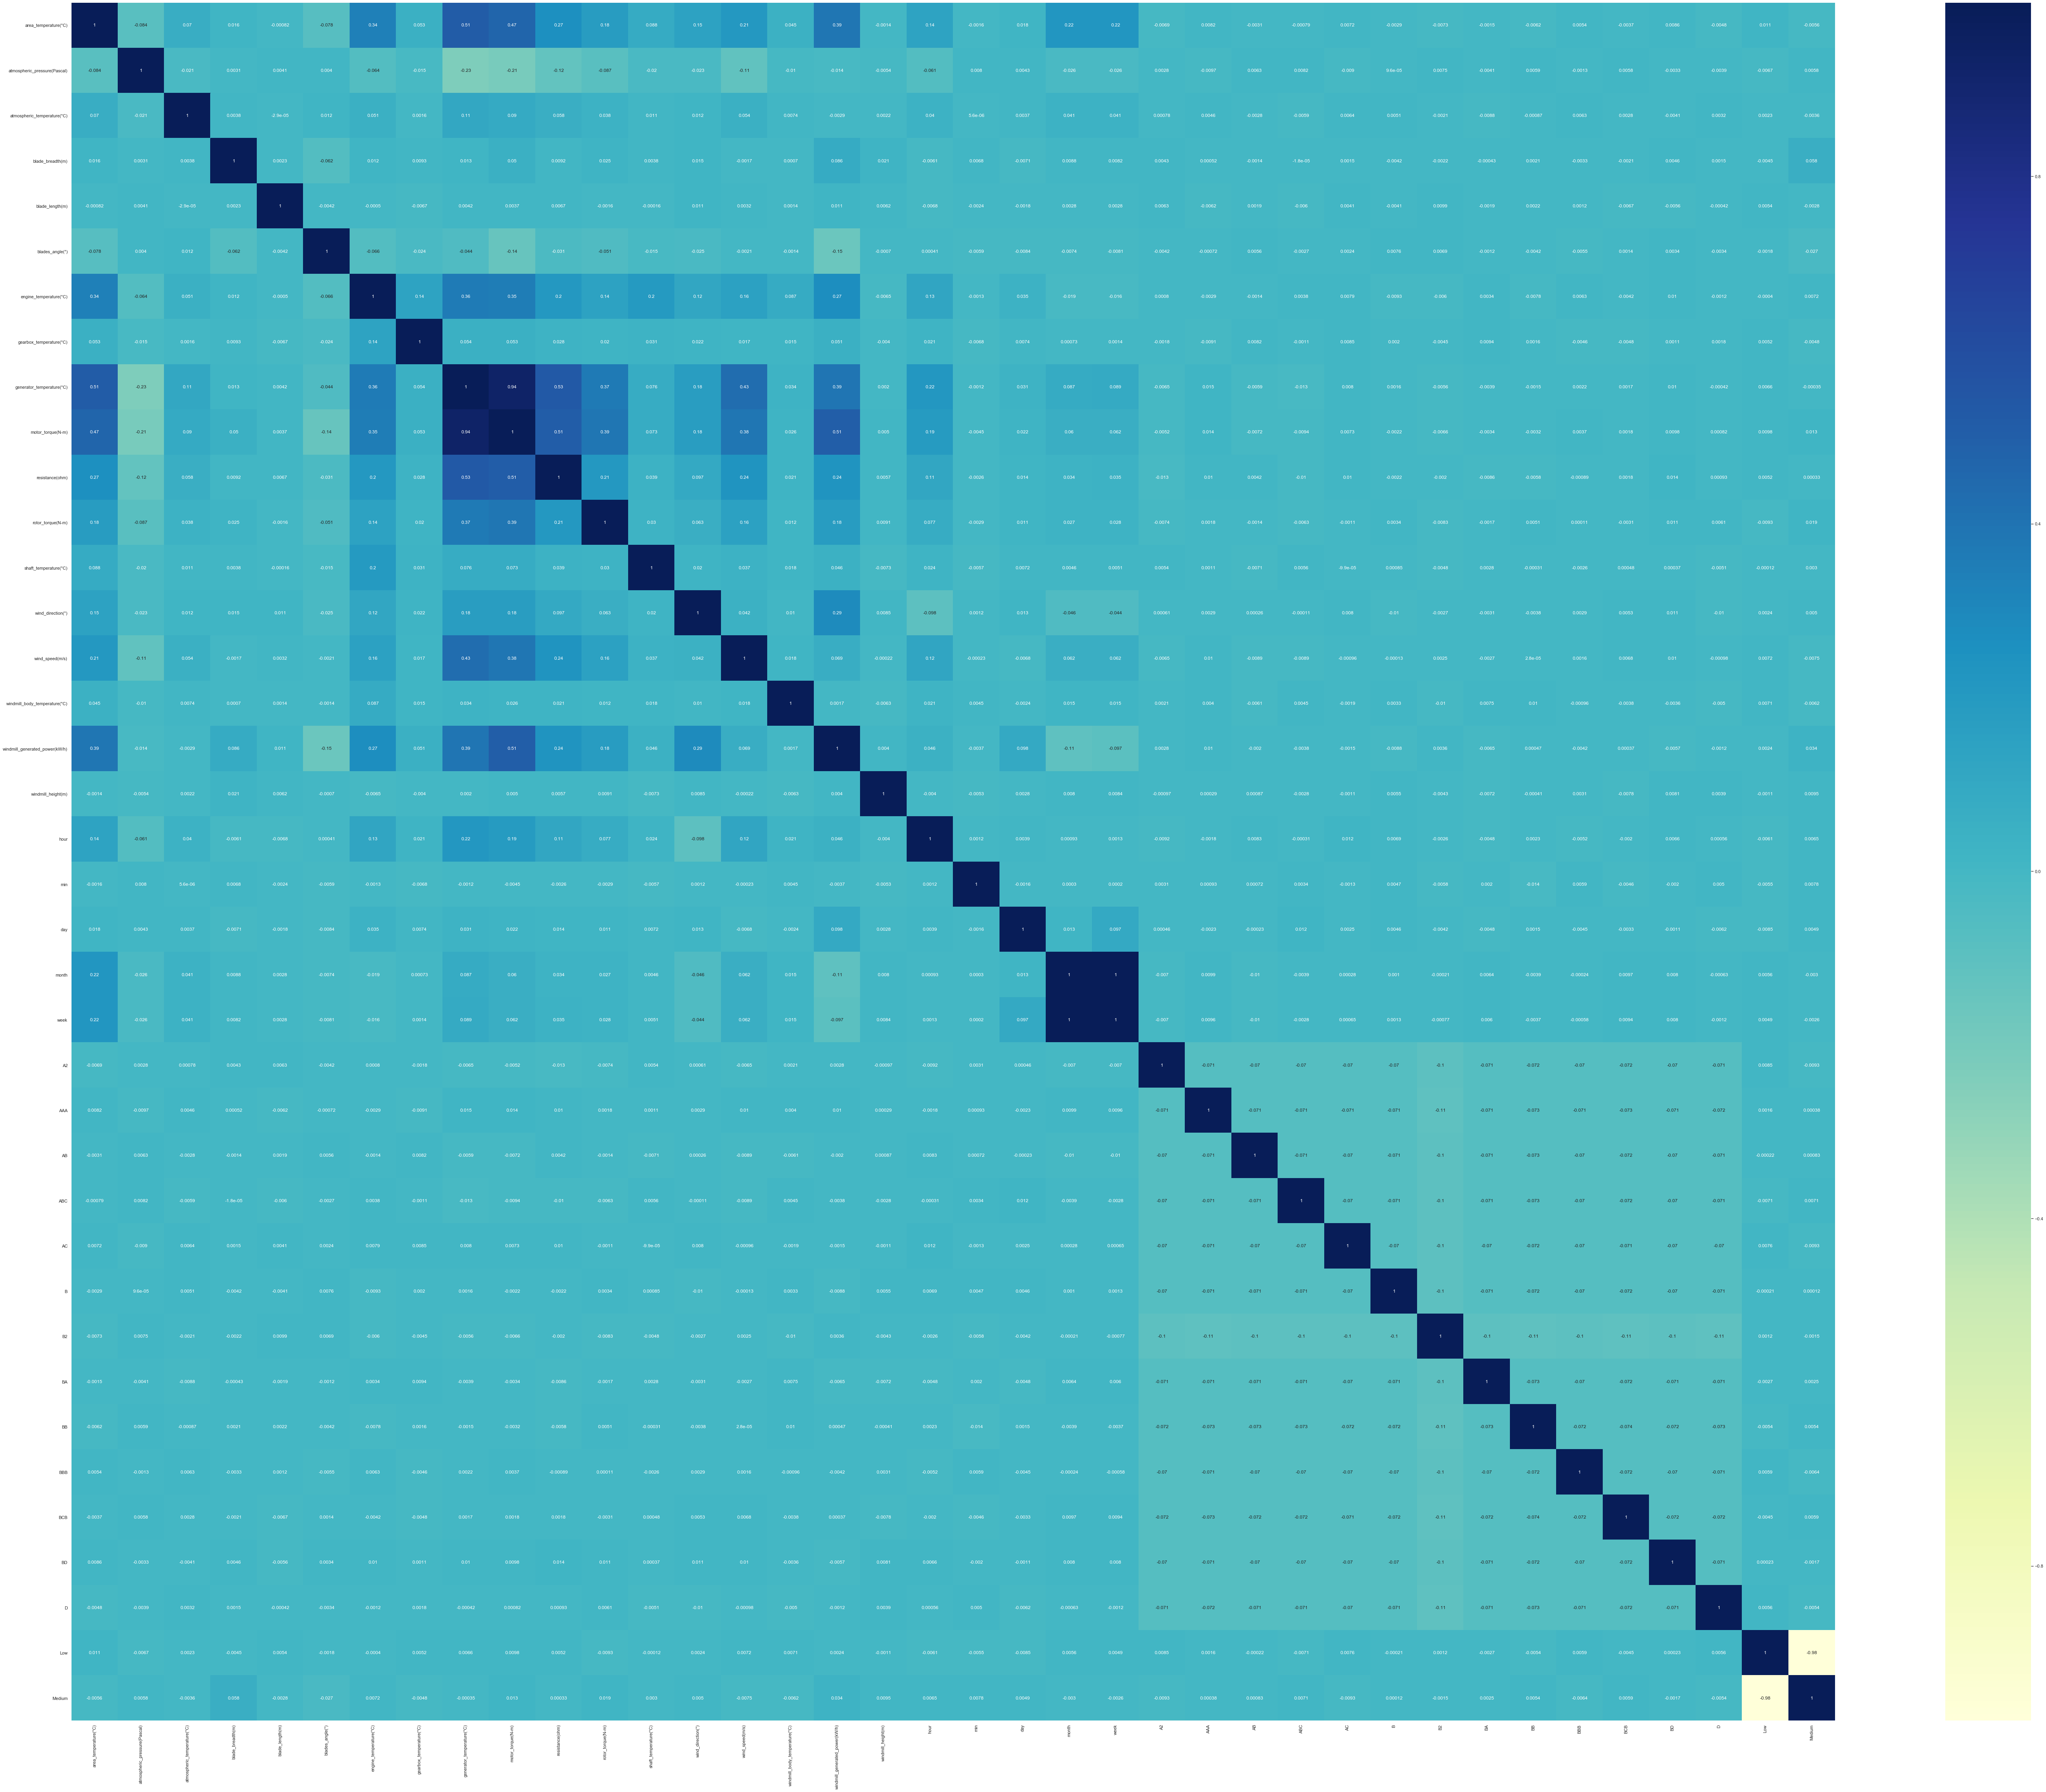

In [828]:
sns.set(rc={'figure.figsize':(100,80)})

# plotting the heatmap
hm = sns.heatmap(data = df.corr(), cmap="YlGnBu", annot=True)
  
# displaying the plotted heatmap
plt.show()

In [829]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
#             print(abs(corr_matrix.iloc[i,j]))
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [830]:
correlation(df,0.5)

{'Medium',
 'generator_temperature(°C)',
 'motor_torque(N-m)',
 'resistance(ohm)',
 'week',
 'windmill_generated_power(kW/h)'}

In [831]:
df_temp = df.copy()

In [832]:
df_temp.shape

(36732, 38)

In [833]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# for col in continous_col:
#     print(col)
#     if col=='windmill_generated_power(kW/h)':
#         continue
    
#     df_temp[col] = scaler.fit_transform(df_temp[col].to_numpy().reshape(-1,1))
    
#     q0 = df_temp[col].quantile(0.25)
#     q1 = df_temp[col].quantile(0.25)
#     q3 = df_temp[col].quantile(0.75)
#     q4 = df_temp[col].quantile(1)
#     iqr = q3 - q1
#     print(q0,q1,q3,q4,iqr)
#     print(df_temp.shape)
    
#     df_temp = df_temp[(df_temp[col]>=q1-2*iqr) & (df_temp[col]<=q1+2*iqr)]   

In [834]:
df_temp.shape

(36732, 38)

In [835]:
df_temp.shape

(36732, 38)

In [836]:
import xgboost

In [837]:
df.shape[0]

36732

In [838]:
dfTrain = df.iloc[:df_train.shape[0],:]
dfTest = df.iloc[df_train.shape[0]:,:]

In [839]:
y = dfTrain['windmill_generated_power(kW/h)']
dfTrain.drop(['windmill_generated_power(kW/h)'],axis=1,inplace=True)

In [840]:
dfTrain.columns

Index(['area_temperature(°C)', 'atmospheric_pressure(Pascal)',
       'atmospheric_temperature(°C)', 'blade_breadth(m)', 'blade_length(m)',
       'blades_angle(°)', 'engine_temperature(°C)', 'gearbox_temperature(°C)',
       'generator_temperature(°C)', 'motor_torque(N-m)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'shaft_temperature(°C)', 'wind_direction(°)',
       'wind_speed(m/s)', 'windmill_body_temperature(°C)',
       'windmill_height(m)', 'hour', 'min', 'day', 'month', 'week', 'A2',
       'AAA', 'AB', 'ABC', 'AC', 'B', 'B2', 'BA', 'BB', 'BBB', 'BCB', 'BD',
       'D', 'Low', 'Medium'],
      dtype='object')

In [841]:
dfTrain.columns

Index(['area_temperature(°C)', 'atmospheric_pressure(Pascal)',
       'atmospheric_temperature(°C)', 'blade_breadth(m)', 'blade_length(m)',
       'blades_angle(°)', 'engine_temperature(°C)', 'gearbox_temperature(°C)',
       'generator_temperature(°C)', 'motor_torque(N-m)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'shaft_temperature(°C)', 'wind_direction(°)',
       'wind_speed(m/s)', 'windmill_body_temperature(°C)',
       'windmill_height(m)', 'hour', 'min', 'day', 'month', 'week', 'A2',
       'AAA', 'AB', 'ABC', 'AC', 'B', 'B2', 'BA', 'BB', 'BBB', 'BCB', 'BD',
       'D', 'Low', 'Medium'],
      dtype='object')

In [842]:
regressor = xgboost.XGBRegressor()

In [843]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RandomizedSearchCV

In [844]:
# booster=['gbtree','gblinear']
# base_score=[0.25,0.5,0.75,1]

# n_estimators = [100, 500, 900, 1100, 1500]
# max_depth = [2, 3, 5, 10, 15]
# booster=['gbtree','gblinear']
# learning_rate=[0.05,0.1,0.15,0.20]
# min_child_weight=[1,2,3,4]

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score
#     }

In [845]:
# # Set up the random search with 4-fold cross validation
# random_cv = RandomizedSearchCV(estimator=regressor,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)
# random_cv.fit(dfTrain,y)

In [846]:
# random_cv.best_estimator_

In [847]:
# regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.05, max_delta_step=0, max_depth=15,
#              min_child_weight=4, missing=np.nan, monotone_constraints='()',
#              n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)

In [848]:
regressor = xgboost.XGBRegressor()

In [849]:
model = regressor.fit(dfTrain,y)

In [850]:
dfTest.drop(['windmill_generated_power(kW/h)'],axis=1,inplace=True)

In [851]:
dfTest.columns

Index(['area_temperature(°C)', 'atmospheric_pressure(Pascal)',
       'atmospheric_temperature(°C)', 'blade_breadth(m)', 'blade_length(m)',
       'blades_angle(°)', 'engine_temperature(°C)', 'gearbox_temperature(°C)',
       'generator_temperature(°C)', 'motor_torque(N-m)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'shaft_temperature(°C)', 'wind_direction(°)',
       'wind_speed(m/s)', 'windmill_body_temperature(°C)',
       'windmill_height(m)', 'hour', 'min', 'day', 'month', 'week', 'A2',
       'AAA', 'AB', 'ABC', 'AC', 'B', 'B2', 'BA', 'BB', 'BBB', 'BCB', 'BD',
       'D', 'Low', 'Medium'],
      dtype='object')

In [852]:
y_pred = model.predict(dfTest)

In [853]:
df_test.shape

(12086, 21)

In [854]:
pred = pd.DataFrame(y_pred)
dataset = pd.concat([df_test[['tracking_id','datetime']],pred],axis=1)

In [855]:
dataset.columns = ['tracking_id','datetime','windmill_generated_power(kW/h)']

In [856]:
dataset

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.569359
1,WM_18723,2019-03-30 07:43:20,2.305607
2,WM_34552,2019-08-10 11:33:20,3.096608
3,WM_28570,2019-06-26 03:53:20,6.238266
4,WM_36934,2019-08-27 16:43:20,3.599729
...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,6.641764
12082,WM_1630,2018-11-12 17:33:20,3.300880
12083,WM_24703,2019-05-27 11:53:20,5.015079
12084,WM_22893,2019-05-13 21:53:20,5.357012


In [857]:
dataset.to_csv('sample_submission.csv',index=False)